In [1]:
# Manipulating csv file 
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Waring filter 
import warnings
warnings.filterwarnings('ignore')

# Handel temporal data
from datetime import datetime,timedelta

In [2]:
ss_data = pd.read_csv('Superstore_Data_(2015-2018).csv')
print(f"Shape of dataframe {ss_data.shape}")
ss_data.head()

Shape of dataframe (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Finding the category of product that our store deals in

ss_data['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

**There are several Categories in the Superstore sale data, we will start from time series analysis and forcasting fror office supply Sales**

In [4]:
os_Sales = ss_data.loc[ss_data['Category']=='Office Supplies']
print(f'Office sale data shape : {os_Sales.shape}')
os_Sales.head()

Office sale data shape : (6026, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [5]:
print('Starting date:',os_Sales['Order Date'].min())
print('Ending date:',os_Sales['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


In [6]:
# Dropping irrelivant varaiables

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


os_Sales.drop(cols, axis=1, inplace= True)
os_Sales 

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [7]:
### Check out missing values:
os_Sales.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
os_Sales.head()

,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900


In [9]:
os_Sales['Order Date'] = pd.to_datetime(os_Sales['Order Date'])

In [10]:
ds_sorted = os_Sales.sort_values(by='Order Date')

In [11]:
ds_sorted.reset_index()


,index,Order Date,Sales
0,7980,2014-01-03,16.448
1,740,2014-01-04,272.736
2,739,2014-01-04,11.784
3,741,2014-01-04,3.540
4,1759,2014-01-05,19.536
...,...,...,...
6021,5091,2017-12-30,3.024
6022,1297,2017-12-30,20.720
6023,908,2017-12-30,52.776
6024,1296,2017-12-30,13.904


In [12]:
ds_sorted = ds_sorted.set_index('Order Date')

In [13]:
ds_sorted.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536


In [14]:
# Aggrigating office Sales by date

os_agg= ds_sorted.resample('D').sum()
os_agg.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


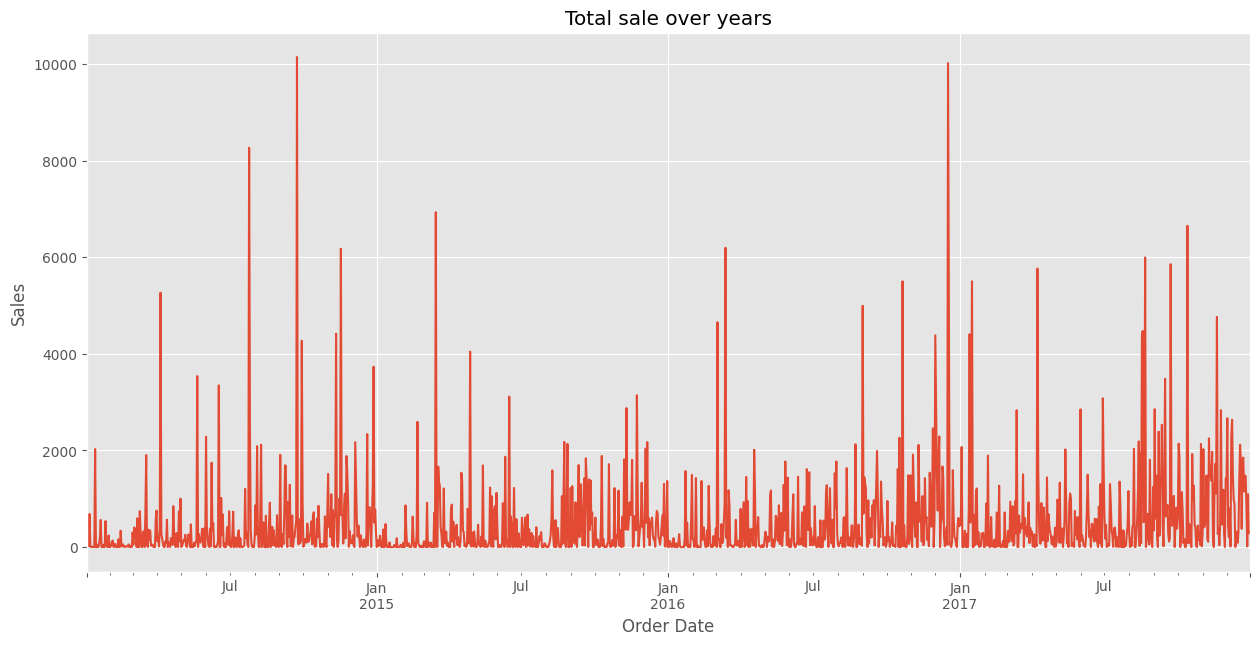

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot
os_agg['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

**The above figure is difficult to interpret so we will sample the data to get some visual interpretability of our data**

In [16]:
# Taking year 2014 and 2015 as sample
viz_sample = os_agg[os_agg.index.year <= 2015]

In [17]:
viz_sample.tail()

,Sales
Order Date,
2015-12-27,1305.924
2015-12-28,24.816
2015-12-29,6.360
2015-12-30,414.900
2015-12-31,1366.584


In [18]:
viz_sample.iloc[365]

Sales    17.424
Name: 2015-01-03 00:00:00, dtype: float64

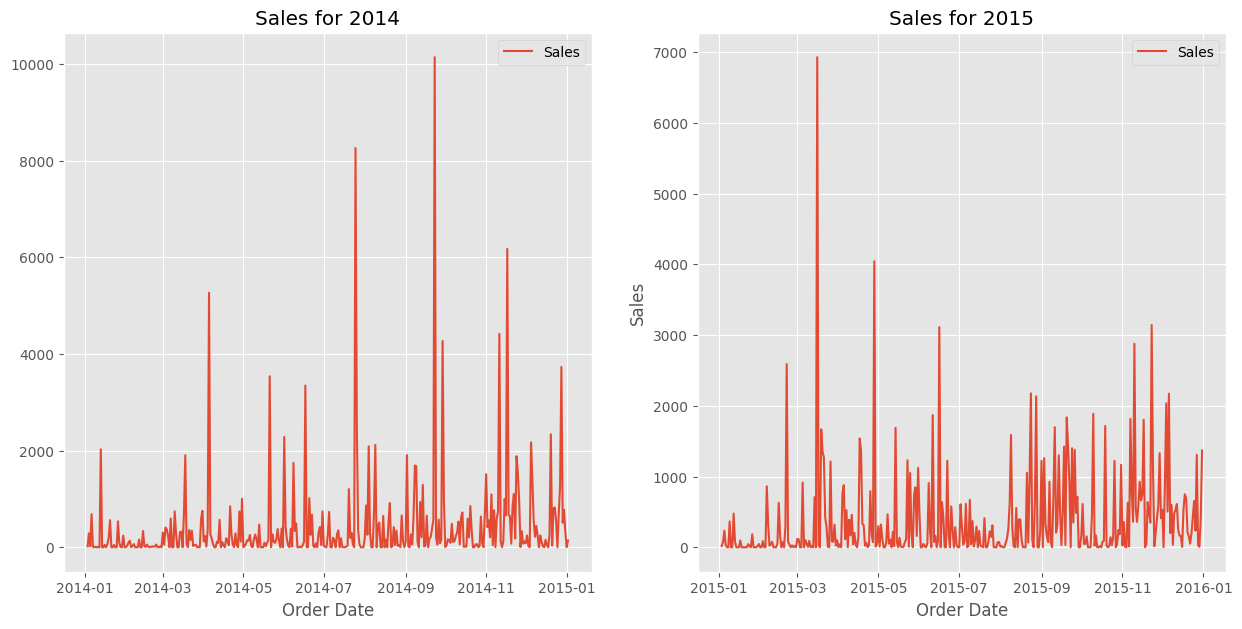

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
sns.lineplot(viz_sample.iloc[:365], ax=ax1)
sns.lineplot(viz_sample.iloc[365:], ax=ax2)
plt.xlabel('Order Date')
plt.ylabel('Sales')
ax1.set_title('Sales for 2014')
ax2.set_title('Sales for 2015')
plt.show()

**We can see recurring spikes in our data but these spikes are random rather than seasonal so our data might be cyclical instead of seasonal**

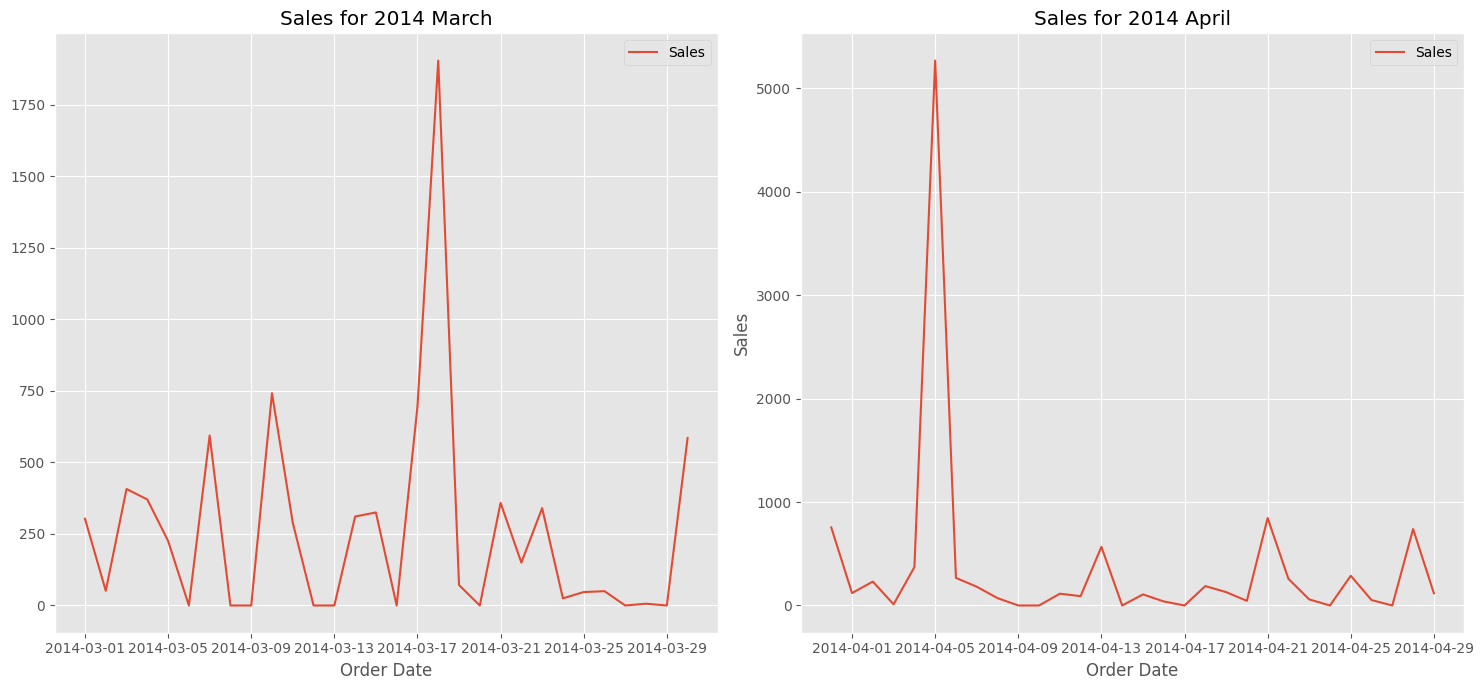

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))
sns.lineplot(viz_sample.iloc[57:87], ax=ax1)
sns.lineplot(viz_sample.iloc[87:117], ax=ax2)
plt.xlabel('Order Date')
plt.ylabel('Sales')
ax1.set_title('Sales for 2014 March')
ax2.set_title('Sales for 2014 April')
plt.tight_layout()
plt.show()

There is no specific pattern here as well but a recurring spike is present which suggest a cyclical data

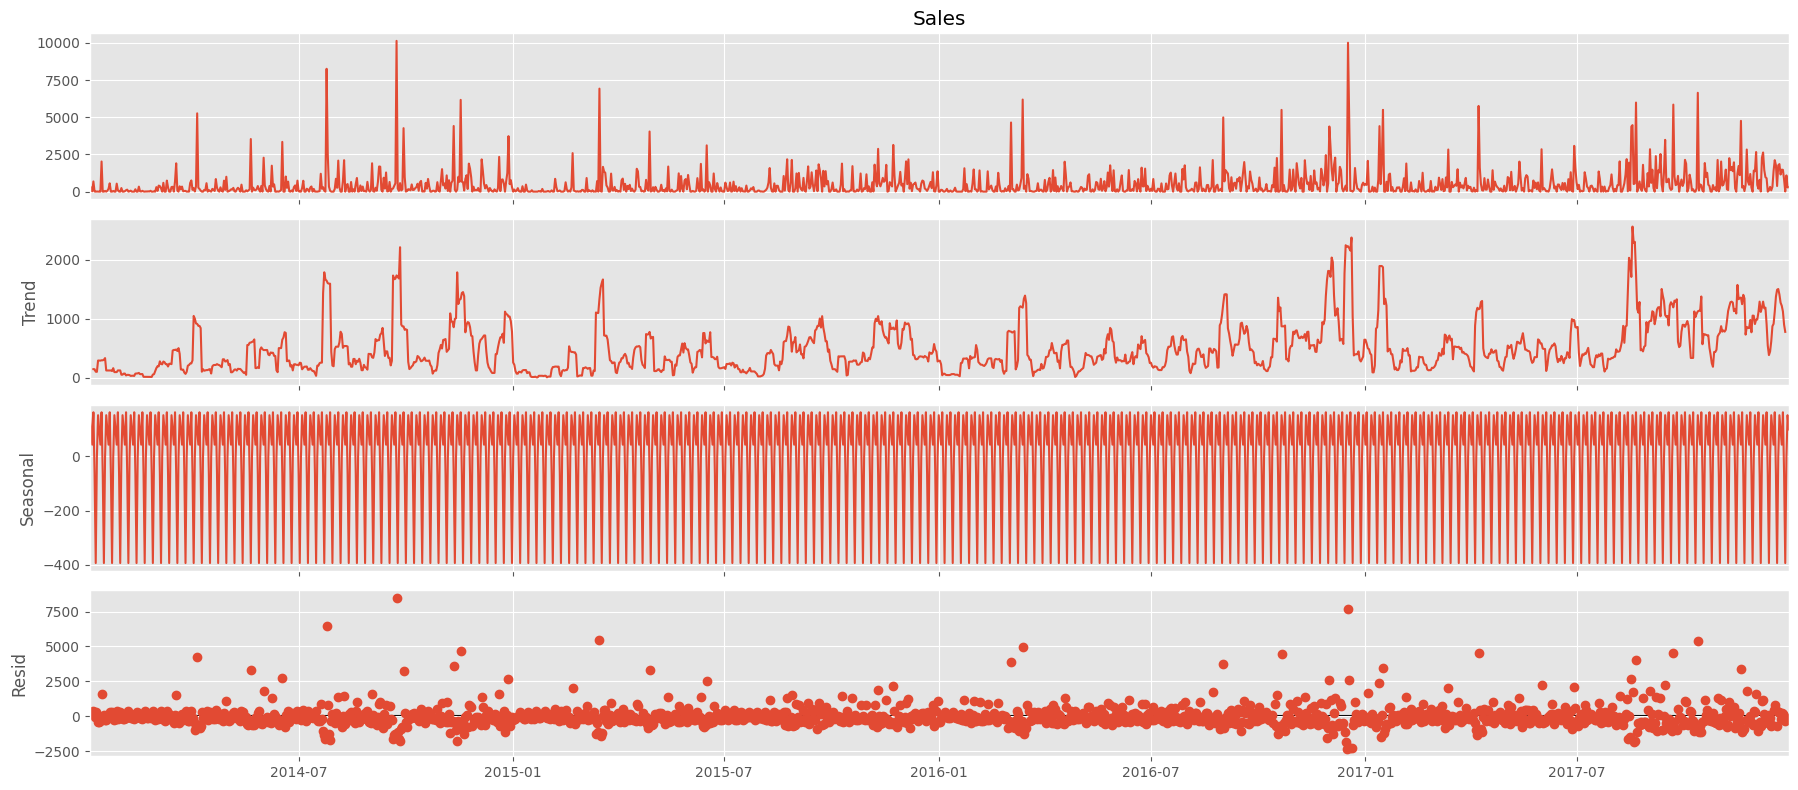

In [27]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(os_agg['Sales'], model='addative')
fig = decomposition.plot()
plt.show()

# Checking missing dates and imputing  

In [28]:
os_agg.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [46]:
nb_missing_timestamps = len(pd.date_range(
 start=os_agg.index.min(), end=os_agg.index.max()).difference(
 os_agg.index
 )
)
print(str(nb_missing_timestamps) + ' missings timestamps')

0 missings timestamps


# Removing outliers using z-score 

In [60]:
# Cleaning low volume data 
per_zero = len(os_agg[os_agg['Sales'] == 0])/len(os_agg)*100
print(f'{per_zero: .2f}% of the data has 0 value')

 21.26% of the data has 0 value


In [68]:
from scipy import stats
z = np.abs(stats.zscore(os_agg['Sales']))
outlier_index = np.where(z > 2.7)[0]
outlier_index

array([  92,  138,  165,  203,  263,  269,  312,  318,  359,  437,  480,
        529,  689,  790,  800,  972, 1022, 1063, 1064, 1079, 1080, 1106,
       1109, 1191, 1273, 1322, 1323, 1326, 1351, 1358, 1379, 1416])

In [87]:
# We will be changing our values below z score 2.7 to Nan and then imputing them
clean_data = os_agg.copy().reset_index()
clean_data.loc[outlier_index] = np.nan
clean_data["Sales"].isna().sum()

32

In [88]:
# selecting columns without zero value
clean_data['Sales'].replace(0, np.nan, inplace= True)
clean_data["Sales"].isna().sum()

342

In [89]:
# Imputing removed data
imputed_data = clean_data.interpolate(method='linear')
imputed_data["Sales"].isna().sum()

0

In [92]:
imputed_data.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [95]:
imputed_data.set_index("Order Date", inplace=True)

<Figure size 1500x700 with 0 Axes>

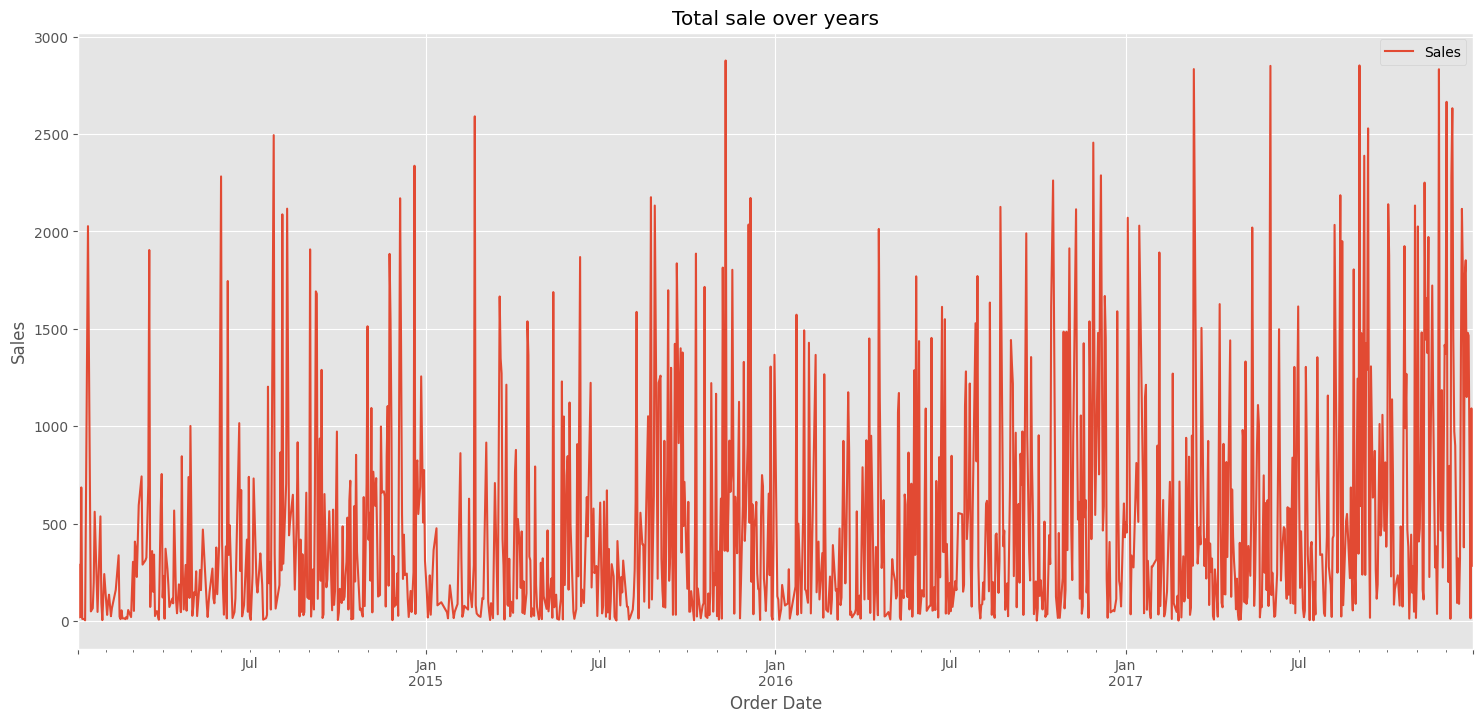

In [101]:
# Visualizing data 
plt.figure(figsize=(15,7))
sns.lineplot
imputed_data.plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

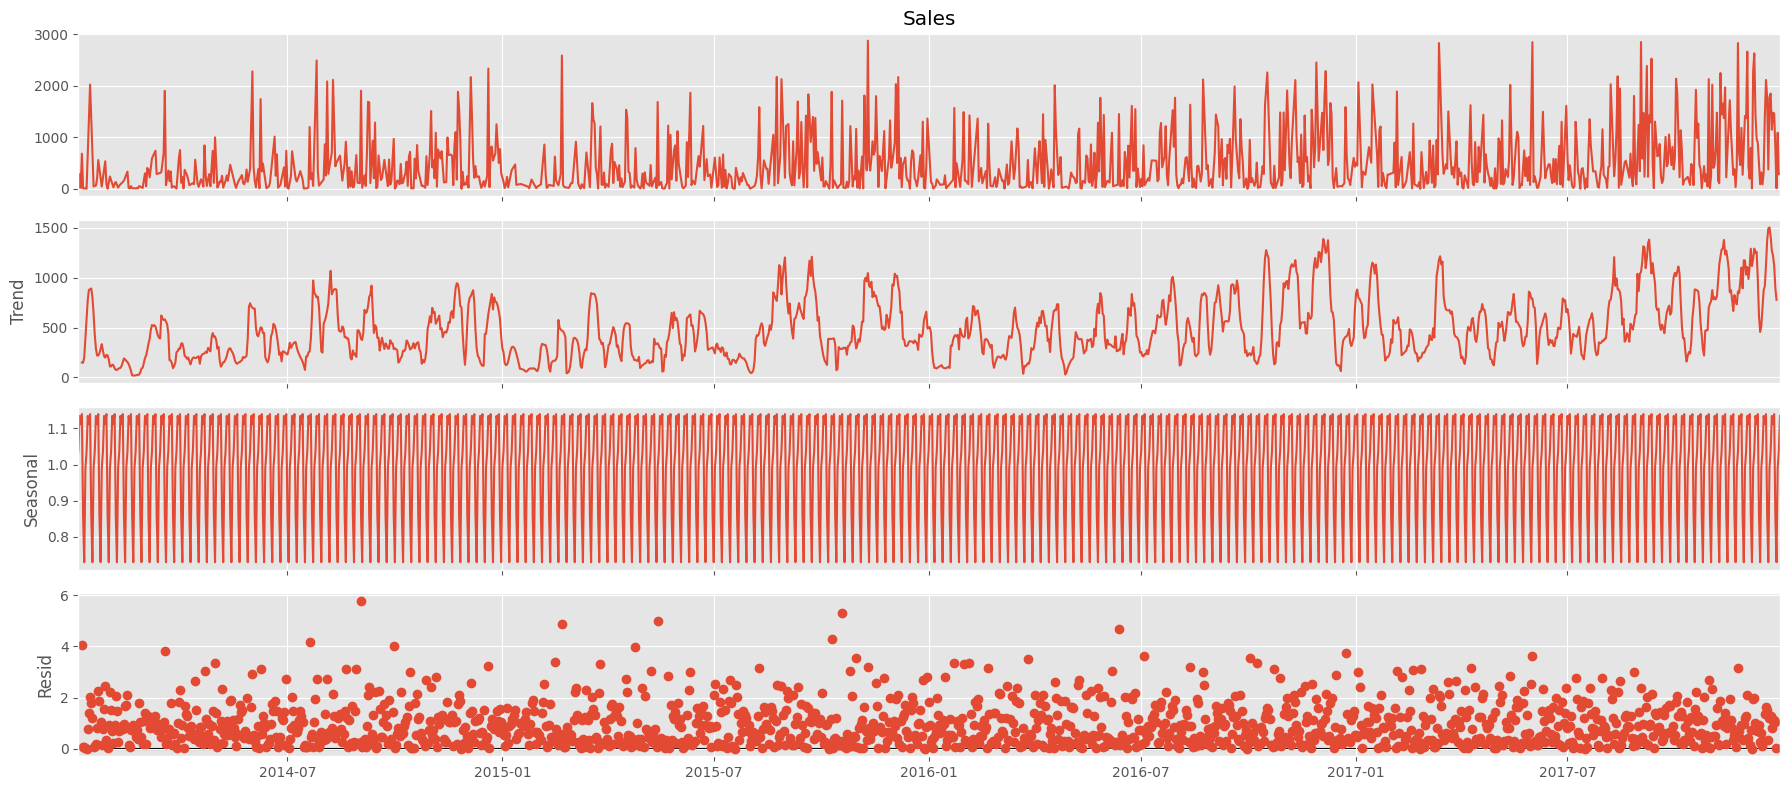

In [99]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(imputed_data['Sales'], model='multiplicative')
fig = decomposition.plot()
plt.show()

**We can clearly observe that even after cleaning our data the dataset it absolutely random with no trackable seasonality or trend. A temporal data with such random walk cannot be modeled accurately but we will still attempt to use ARIMA, SERIMAX and fb prophet**

# Checking Stationality of dataset with ADF tets

In [102]:
from statsmodels.tsa.stattools import adfuller

In [103]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [104]:
adf_test(imputed_data['Sales'])

ADF Statistics: -6.986969088905924
p- value: 7.922880792248611e-10
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


A satationary data suggests that we do not need to apply any kind of techniques such as differencing to make our data stationary so the prefered value for differencing (d) in ARIMA will be 0 

# Plotting ACF and PACF
**Partial Autocorrelation will help us determine our value for Autoregression (p) and our moving average value (q) for our ARIMA model.** 

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

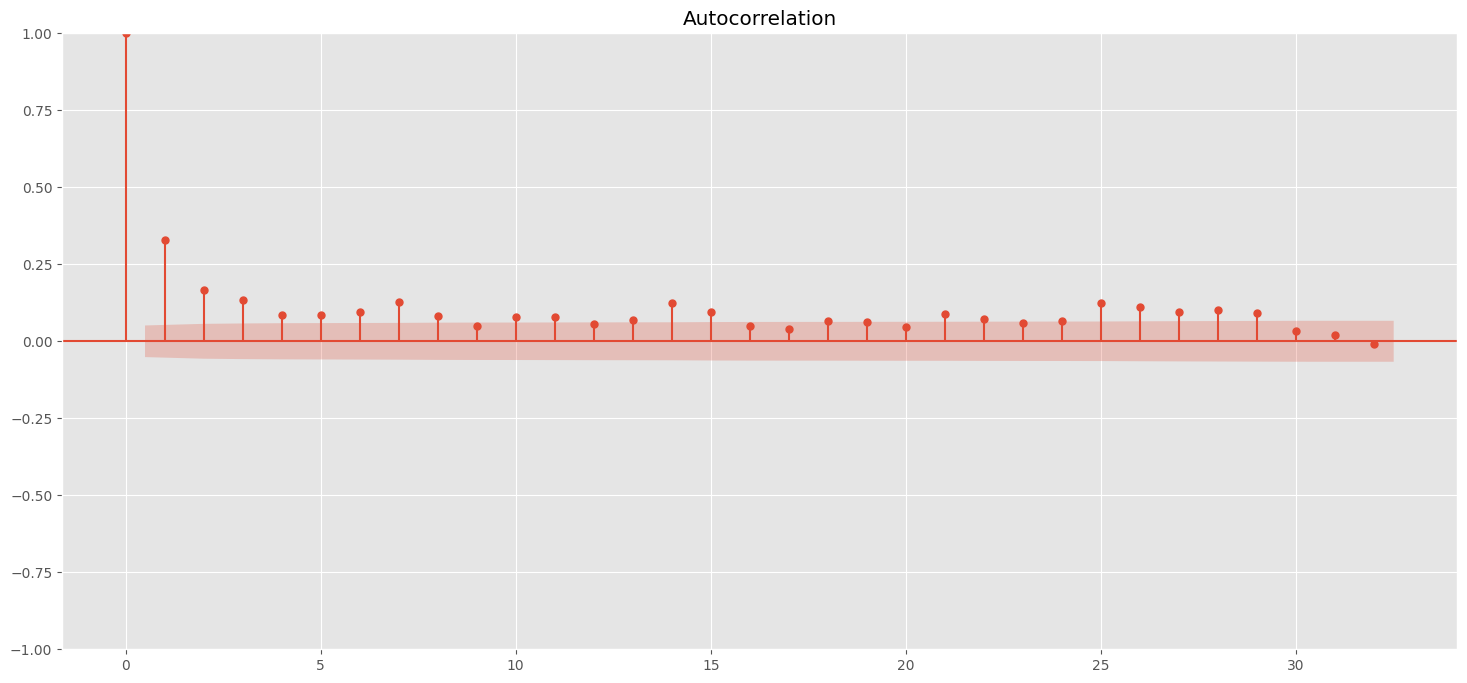

In [106]:
acf = plot_acf(imputed_data["Sales"])

**The Autocorrelation graph will give us the value for our Moving Average (q) for our ARIMA model which the graph seems to suggest is 8**

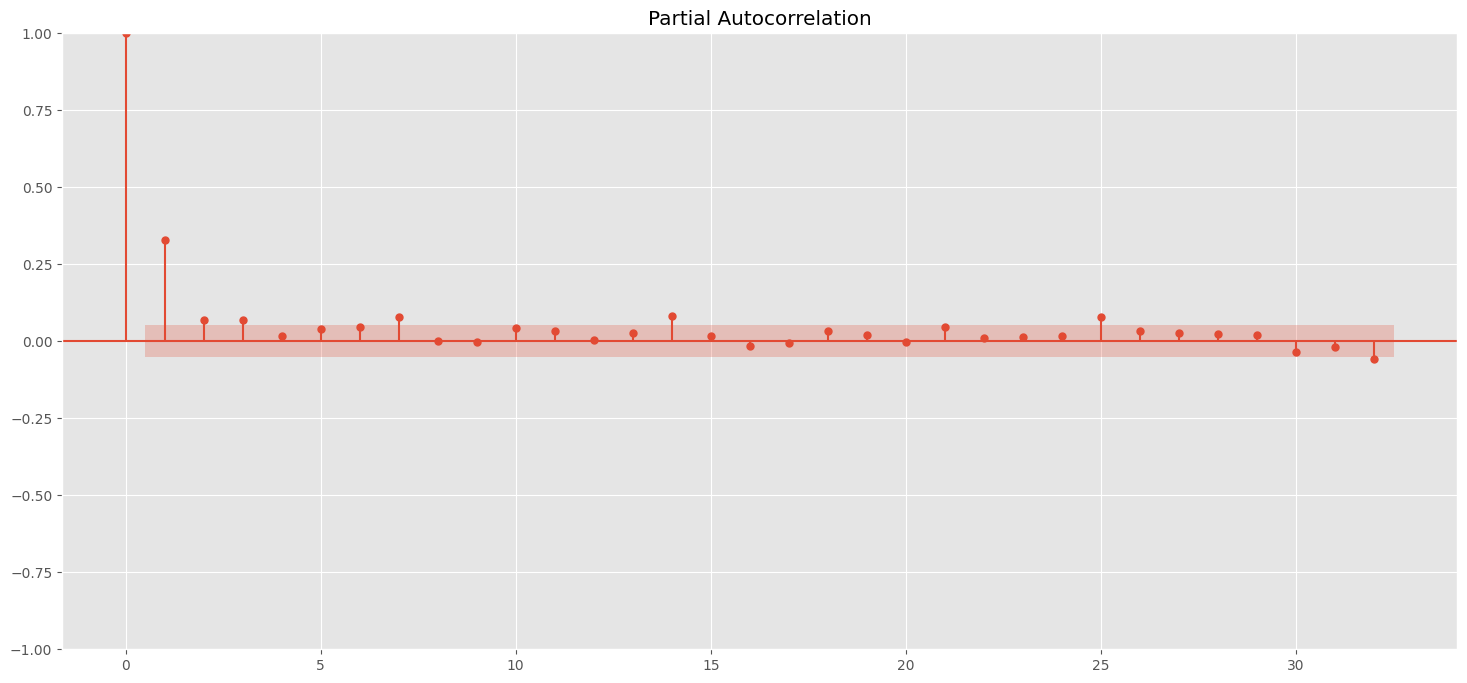

In [107]:
pacf = plot_pacf(imputed_data["Sales"])

**The Partia autocorrelation graph will give us the value for our Autoregression (p) for our ARIMA model which the graph seems to suggest is 3**

# Determining train test split 

In [108]:
imputed_data.shape

(1458, 1)

In [109]:
1458*0.8

1166.4

In [110]:
train = imputed_data[ :1167] # 80%
test = imputed_data[1167: ] # 20%

# Running Auto ARIMA to determine the best fit p,d,q for ARIMA

In [111]:
from pmdarima import auto_arima

In [112]:
auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17690.420, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17827.465, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17692.919, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17714.697, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18478.862, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=17692.085, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17691.956, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=17692.179, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17690.838, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17691.420, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17692.048, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=17691.267, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=17692.797, Time=1.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=17687.038, Time=0.99 sec
 ARIMA(1,0,2)(0,0,0

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**The auto ARIMA suggests that the best parameters for p and q would be 2**

# ARIMA model

In [127]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(2,0,2)).fit() # The auto arima parameters were giving a slightly lower MAPE
model.summary()

/home/rohan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rohan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rohan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1167
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -8835.661
Date:                Fri, 07 Jun 2024   AIC                          17683.322
Time:                        23:23:08   BIC                          17713.695
Sample:                    01-03-2014   HQIC                         17694.779
                         - 03-14-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.4465     70.748      6.141      0.000     295.782     573.111
ar.L1          1.4017      0.110     12.717      0.000       1.186       1.618
ar.L2         -0.4106      0.106     -3.873      0.000      -0.618      -0.203
ma.L1         -1.1009      0.115     -9.610      0.000      -1.325      -0.876
ma.L2          0.1303      0.104      1.255      0.209      -0.073       0.334
sigma2      2.226e+05   8443.051     26.366      0.000    2.06e+05    2.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1175.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             1.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
pred= model.predict(start=len(train), end=(len(os_agg)-1),dynamic=True)
pred

2017-03-15    1051.341000
2017-03-16     737.725169
2017-03-17     606.236872
2017-03-18     550.709952
2017-03-19     526.870969
                 ...     
2017-12-26     435.429281
2017-12-27     435.414235
2017-12-28     435.399418
2017-12-29     435.384829
2017-12-30     435.370463
Freq: D, Name: predicted_mean, Length: 291, dtype: float64

In [129]:
pred.index = test.index

pred_levels = pd.Series(pred, index=test.index)
pred_levels

test['predictions'] = pred_levels

In [130]:
test

,Sales,predictions
Order Date,,
2017-03-15,1380.118667,1051.341000
2017-03-16,653.341000,737.725169
2017-03-17,294.386000,606.236872
2017-03-18,379.874000,550.709952
2017-03-19,481.154000,526.870969
...,...,...
2017-12-26,814.594000,435.429281
2017-12-27,13.248000,435.414235
2017-12-28,1091.244000,435.399418


<Axes: xlabel='Order Date'>

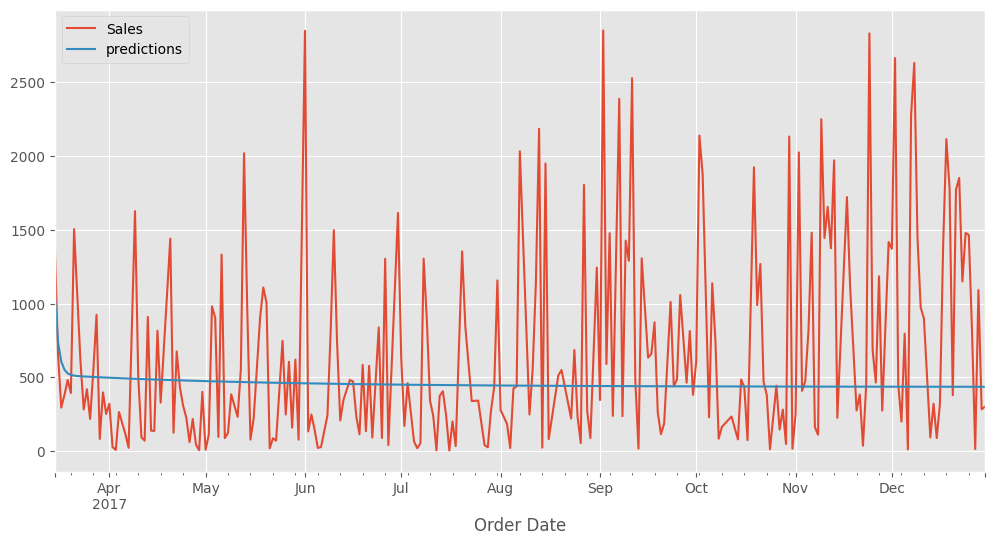

In [131]:
test[['Sales','predictions']].plot(figsize=(12,6))

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE", mean_absolute_error(test['Sales'], test['predictions']))
print("MSE", mean_squared_error(test['Sales'], test['predictions']))
print("RMSE", np.sqrt(mean_squared_error(test['Sales'], test['predictions'])))
r2_bld = r2_score(test['Sales'], test['predictions'])
print("R2 Score", r2_bld)

MAE 468.26318603921635
MSE 450149.3689572299
RMSE 670.9317170601117
R2 Score -0.11595108511429864


In [133]:
mape = np.mean(np.abs((test['Sales'] - test['predictions']) / test['Sales']))*100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 404.13981179620447


**As suspected the model is unable to predict our data set with accuracy as our model has 404% error**

In [134]:
import statsmodels.api as sm

In [157]:
serimax = sm.tsa.statespace.SARIMAX(train, order = (2,1,2), seasonal_order=(1,1,1,7))
results = serimax.fit()

/home/rohan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rohan/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82393D+00    |proj g|=  3.24197D-01

At iterate    5    f=  7.66636D+00    |proj g|=  2.19200D-02

At iterate   10    f=  7.64945D+00    |proj g|=  4.37345D-03

At iterate   15    f=  7.64902D+00    |proj g|=  1.31965D-03

At iterate   20    f=  7.64797D+00    |proj g|=  7.62338D-04

At iterate   25    f=  7.64456D+00    |proj g|=  3.54685D-02

At iterate   30    f=  7.53884D+00    |proj g|=  5.13517D-02

At iterate   35    f=  7.53693D+00    |proj g|=  3.22835D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [158]:
test['predictions'] = results.predict(start=len(train), end=(len(os_agg)-1), dynamic=True)


<Axes: xlabel='Order Date'>

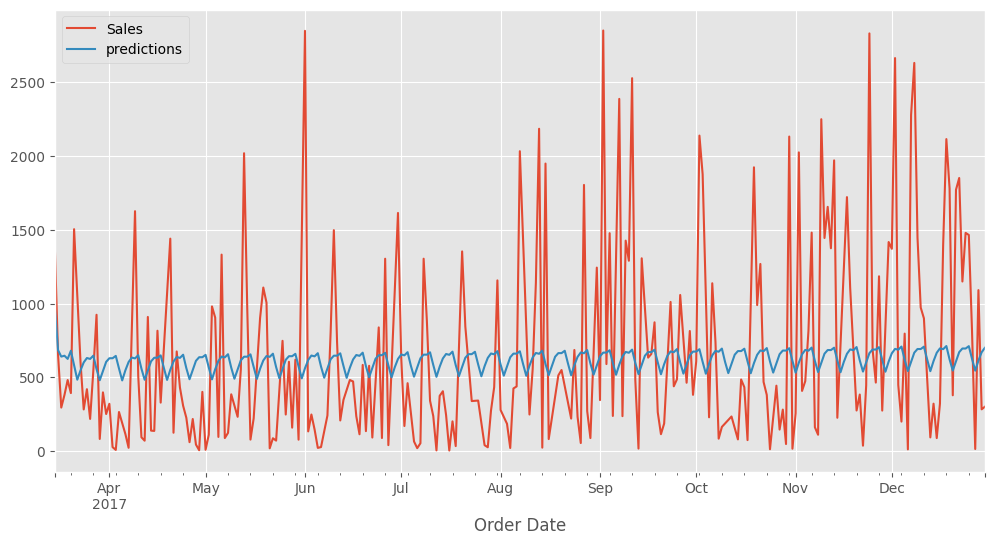

In [159]:
test[['Sales','predictions']].plot(figsize=(12,6))

In [160]:
print("MAE", mean_absolute_error(test['Sales'], test['predictions']))
print("MSE", mean_squared_error(test['Sales'], test['predictions']))
print("RMSE", np.sqrt(mean_squared_error(test['Sales'], test['predictions'])))
r2_bld = r2_score(test['Sales'], test['predictions'])
print("R2 Score", r2_bld)

MAE 484.8857709180027
MSE 391580.0903448086
RMSE 625.7636058007917
R2 Score 0.029246163908399292


In [161]:
mape = np.mean(np.abs((test['Sales'] - test['predictions']) / test['Sales']))*100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 539.0791317771193


In [162]:
#prophet library
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [164]:
imputed_data_1 = imputed_data.copy()

os_reset = imputed_data.reset_index()
os_reset.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [165]:
os_reset.shape

(1458, 2)

In [166]:
os_reset = os_reset.rename(columns={'Order Date':'ds', 'Sales':'y'})

In [167]:
os_reset[['y']] = os_reset[['y']].apply(pd.to_numeric)
os_reset['ds'] = pd.to_datetime(os_reset['ds'])

In [168]:
os_reset.tail()

,ds,y
1453,2017-12-26,814.594
1454,2017-12-27,13.248
1455,2017-12-28,1091.244
1456,2017-12-29,282.440
1457,2017-12-30,299.724


In [169]:
1457-1166

291

In [230]:
#date libraries
from dateutil import parser
from datetime import datetime, timedelta, date

In [231]:
forecast_start_dt = date(2017,3,14) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d") 
print(forecast_start_date)

2017-03-14


In [232]:
predict_data = os_reset.loc[os_reset['ds']>='2017-03-14']

In [233]:
#Just basic PROPHET MODEL without any parameter tuning

train_set = os_reset[(os_reset['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

23:42:09 - cmdstanpy - INFO - Chain [1] start processing
23:42:09 - cmdstanpy - INFO - Chain [1] done processing


In [234]:
future = m.make_future_dataframe(periods = 292)

In [235]:
fcst_prophet_train = m.predict(future)

In [236]:
#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

In [237]:
eval = predicted_df.copy()

In [238]:
eval.reset_index()
eval.set_index('ds')

,yhat
ds,
2017-03-14,546.734339
2017-03-15,481.705915
2017-03-16,555.021273
2017-03-17,616.756892
2017-03-18,645.236567
...,...
2017-12-26,560.519321
2017-12-27,489.871244
2017-12-28,560.004870


In [239]:
act_val = os_reset.loc[os_reset['ds']>='2017-03-14']

In [240]:
act_new = pd.concat([act_val, eval['yhat']], axis = 1)

In [241]:
act_new = act_new.set_index('ds')

<Axes: xlabel='ds'>

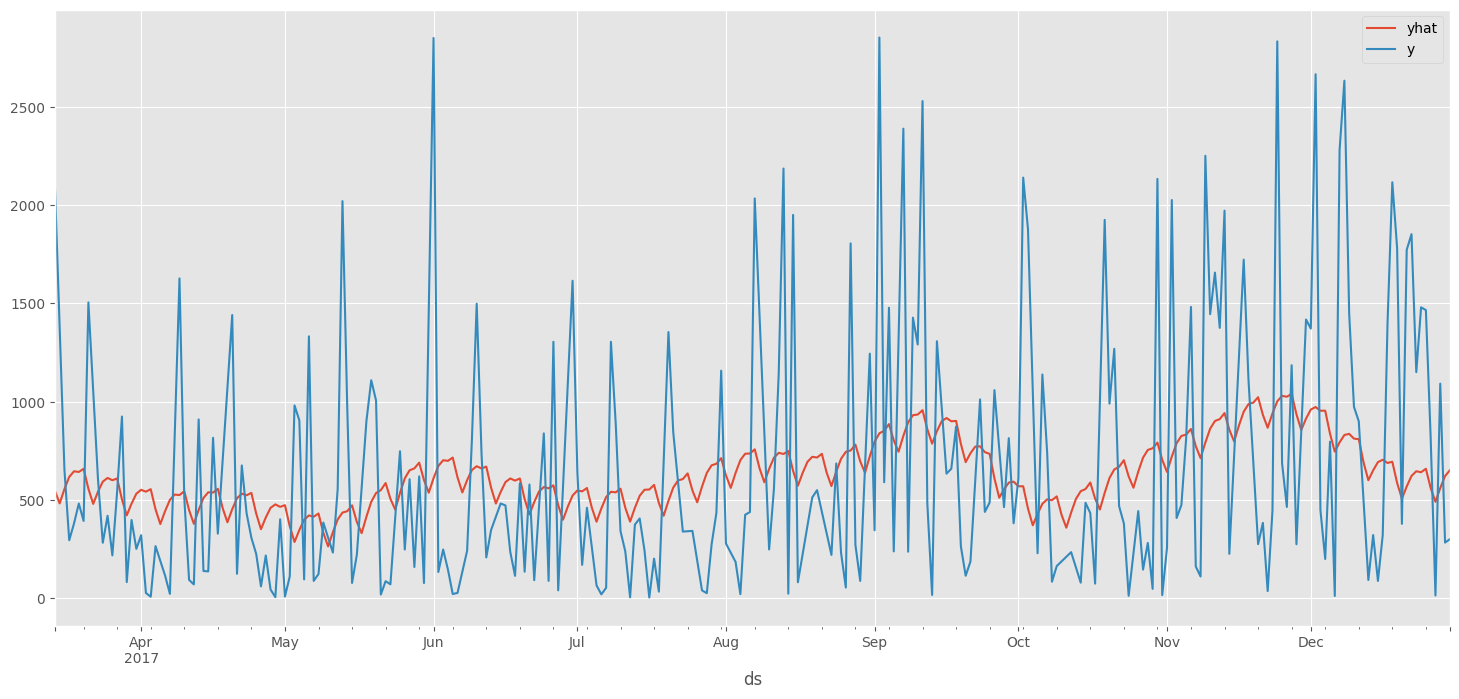

In [242]:
act_new[['yhat','y']].plot()

In [243]:
print("MAE", mean_absolute_error(act_new['y'], act_new['yhat']))
print("MSE", mean_squared_error(act_new['y'], act_new['yhat']))
print("RMSE", np.sqrt(mean_squared_error(act_new['y'], act_new['yhat'])))
r2_bld = r2_score(act_new['y'], act_new['yhat'])
print("R2 Score", r2_bld)

MAE 477.50035973100177
MSE 374715.94842013245
RMSE 612.1404646158694
R2 Score 0.0841188713039237


In [244]:
mape = np.mean(np.abs((act_new['y'] - act_new['yhat']) / act_new['y']))*100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 495.5121012873581


# Cross Validation with Prophet

In [245]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days')

23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/26 [00:00<?, ?it/s]

23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:24 - cmdstanpy - INFO - Chain [1] done processing
23:42:24 - cmdstanpy - INFO - Chain [1] start processing
23:42:25 - cmdstanpy - INFO - Chain [1] done processing
23:42:25 - cmdstanpy - INFO - Chain [1] start processing
23:42:25 - cmdstanpy - INFO - Chain [1] done processing
23:42:25 - cmdstanpy - INFO - Chain [1] start processing
23:42:25 - cmdstanpy - INFO - Chain [1] done processing
23:42:25 - cmdstanpy - INFO - Chain [1] start processing
23:42:25 - cmdstanpy - INFO - Chain [1]

In [246]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,371481.737854,609.493017,449.997711,5.333544,0.831135,1.003796,0.743590
1,4 days,365718.334141,604.746504,444.380632,4.371538,0.780271,0.944693,0.730769
2,5 days,349183.600643,590.917592,430.257082,3.772442,0.785305,0.931391,0.756410
3,6 days,257664.376823,507.606518,399.679239,3.898883,0.731889,0.946202,0.756410
4,7 days,246217.841634,496.203428,386.224673,4.407051,0.807241,0.982340,0.820513
5,8 days,265438.201634,515.206950,402.050923,4.910402,1.254707,1.034169,0.782051
6,9 days,246249.382982,496.235209,372.311850,4.442934,0.793832,0.955907,0.833333
7,10 days,261485.734309,511.356758,397.113209,6.696899,0.721867,0.939063,0.756410
8,11 days,213509.504672,462.070887,362.222845,6.714124,0.686726,0.882080,0.782051
9,12 days,235671.267987,485.459852,385.828031,6.882818,0.732039,0.937346,0.743590


In [247]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y'] 

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
25,2015-02-18,-270.138099,-800.909113,211.983716,70.3000,2015-01-23,484.264721,False
19,2015-02-12,-232.476082,-758.543589,269.388536,67.6270,2015-01-23,443.762229,False
18,2015-02-11,-216.657262,-722.013099,272.669735,72.4335,2015-01-23,399.111961,False
20,2015-02-13,-133.239504,-658.718897,329.625053,62.8205,2015-01-23,312.095580,False
26,2015-02-19,-267.976969,-759.119701,225.318948,178.5450,2015-01-23,250.089316,False
24,2015-02-17,-113.034081,-623.897467,406.837005,115.3650,2015-01-23,197.979527,False
29,2015-02-22,-75.466354,-571.807213,449.032110,79.3600,2015-01-23,195.093693,False
5,2015-01-29,-45.164475,-561.781473,425.642581,56.4080,2015-01-23,180.067499,False
17,2015-02-10,-43.845563,-553.936041,484.458117,77.2400,2015-01-23,156.765358,False
15,2015-02-08,-11.406590,-546.638946,482.873984,21.1100,2015-01-23,154.034060,False


In [248]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
775,2017-03-09,485.987939,-84.326519,1081.757950,30.840,2017-02-11,-1475.836379,True
776,2017-03-10,559.330989,-51.180925,1164.668266,67.124,2017-02-11,-733.280182,True
777,2017-03-11,594.060534,20.559936,1269.606439,951.494,2017-02-11,37.565499,False
778,2017-03-12,588.673704,-47.088556,1195.387825,283.350,2017-02-11,-107.754969,True
779,2017-03-13,610.944032,9.209585,1225.454852,2833.674,2017-02-11,78.439862,False


In [249]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = [] 

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

23:42:34 - cmdstanpy - INFO - Chain [1] start processing
23:42:34 - cmdstanpy - INFO - Chain [1] done processing
23:42:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:42:34 - cmdstanpy - INFO - Chain [1] start processing
23:42:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] start processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:42:36 - cmdstanpy - INFO - Chain [1] done processing
23:

In [250]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                     0.001                     0.01  536.532707
1                     0.001                     0.10  541.240345
2                     0.001                     1.00  543.035982
3                     0.001                    10.00  540.728869
4                     0.010                     0.01  514.184699
5                     0.010                     0.10  518.319621
6                     0.010                     1.00  518.659647
7                     0.010                    10.00  518.842744
8                     0.100                     0.01  516.055390
9                     0.100                     0.10  520.962821
10                    0.100                     1.00  521.729593
11                    0.100                    10.00  521.298578
12                    0.500                     0.01  523.479235
13                    0.500                     0.10  529.743991
14                    0.5

In [251]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
4,0.010,0.01,514.184699
8,0.100,0.01,516.055390
5,0.010,0.10,518.319621
6,0.010,1.00,518.659647
7,0.010,10.00,518.842744
9,0.100,0.10,520.962821
11,0.100,10.00,521.298578
10,0.100,1.00,521.729593
12,0.500,0.01,523.479235
13,0.500,0.10,529.743991


In [252]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale      0.010000
seasonality_prior_scale      0.010000
rmse                       514.184699
Name: 0, dtype: float64

In [253]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 0.01,
 'rmse': 514.1846990234039}

In [254]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'], 
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'])

In [255]:
m.fit(train_set)

23:43:50 - cmdstanpy - INFO - Chain [1] start processing
23:43:50 - cmdstanpy - INFO - Chain [1] done processing


In [256]:
future = m.make_future_dataframe(periods = 292)

In [257]:
fcst_prophet_train = m.predict(future)

In [258]:
#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date 
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

In [259]:
eval = predicted_df.copy()

In [260]:
eval.reset_index()
eval.set_index('ds')

,yhat
ds,
2017-03-14,557.698594
2017-03-15,513.723296
2017-03-16,564.106395
2017-03-17,606.677427
2017-03-18,626.439422
...,...
2017-12-26,580.478294
2017-12-27,532.515357
2017-12-28,580.591826


In [261]:
act_val = os_reset.loc[os_reset['ds']>='2017-03-14']

In [262]:
act_new = pd.concat([act_val, eval['yhat']], axis = 1)

In [263]:
act_new = act_new.set_index('ds')

<Axes: xlabel='ds'>

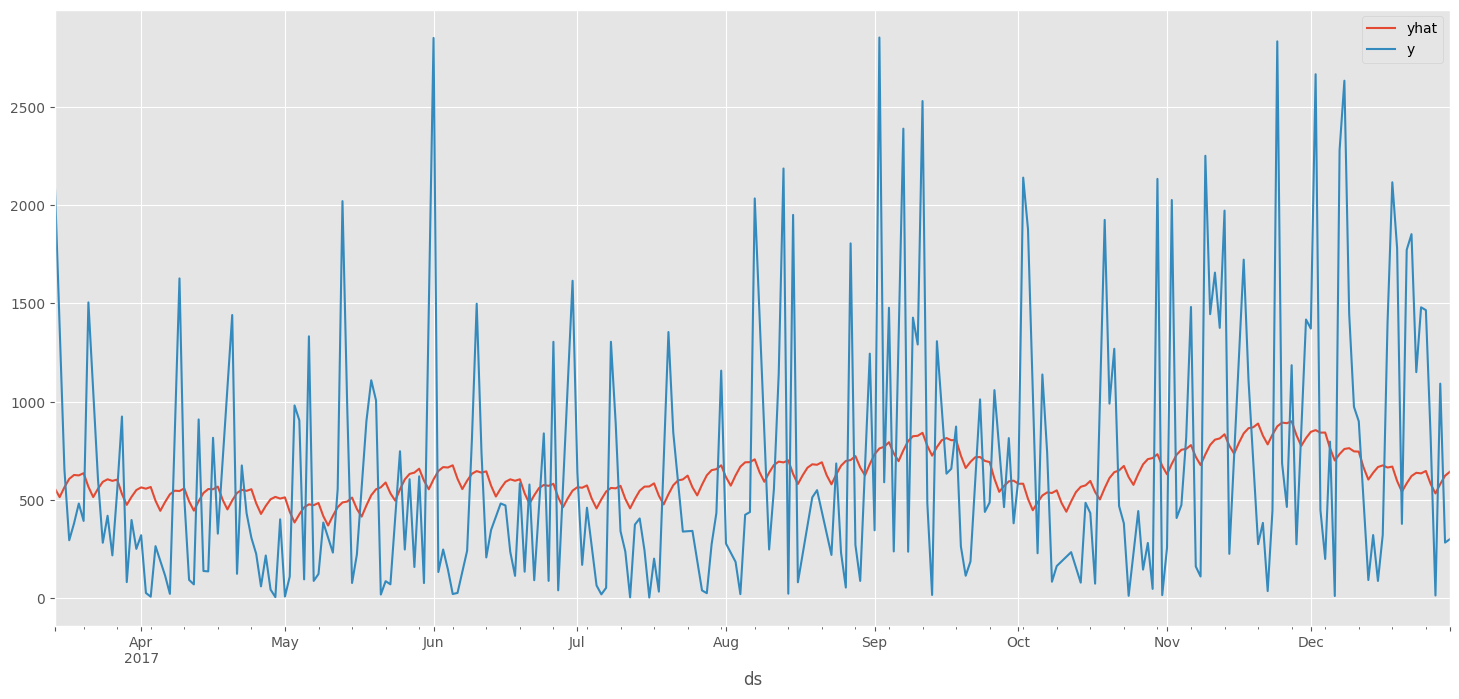

In [264]:
act_new[['yhat','y']].plot()

In [265]:
mape = np.mean(np.abs((act_new['y'] - act_new['yhat']) / act_new['y']))*100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 507.3099839385503


**Our data is absolutelly random and has no decernable trend or seasonality component and is not ideal for modeling yet i have simply modeled the data just to experiment and the base prophet model with no hyperparameters has perfomed least worst**